  target_id                            sequence temporal_cutoff  \
0    1SCL_A       GGGUGCUCAGUACGAGAGGAACCGCACCC      1995-01-26   
1    1RNK_A  GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU      1995-02-27   
2    1RHT_A            GGGACUGACGAUCACGCAGUCUAU      1995-06-03   
3    1HLX_A                GGGAUAACUUCGGUUGUCCC      1995-09-15   
4    1HMH_E  GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU      1995-12-07   

                                         description  \
0               THE SARCIN-RICIN LOOP, A MODULAR RNA   
1  THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...   
2  24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...   
3  P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID   
4  THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...   

                                       all_sequences  
0  >1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...  
1  >1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...  
2  >1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...  
3  >1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*A

<Figure size 1000x600 with 0 Axes>

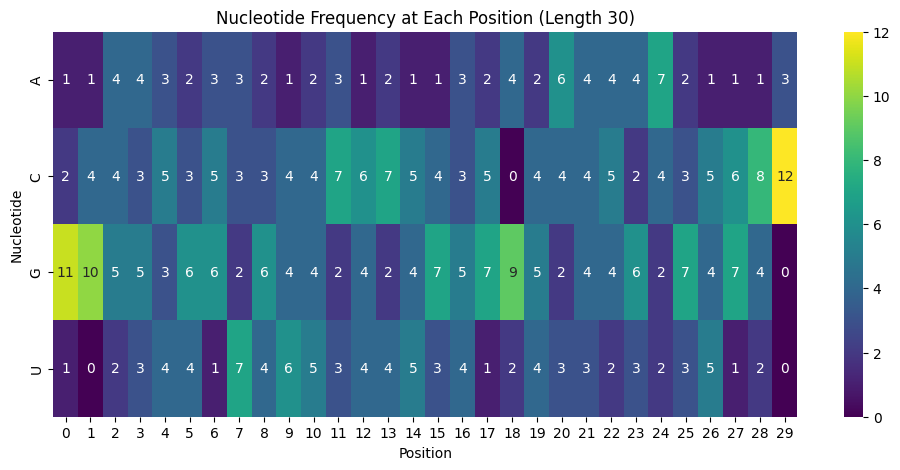

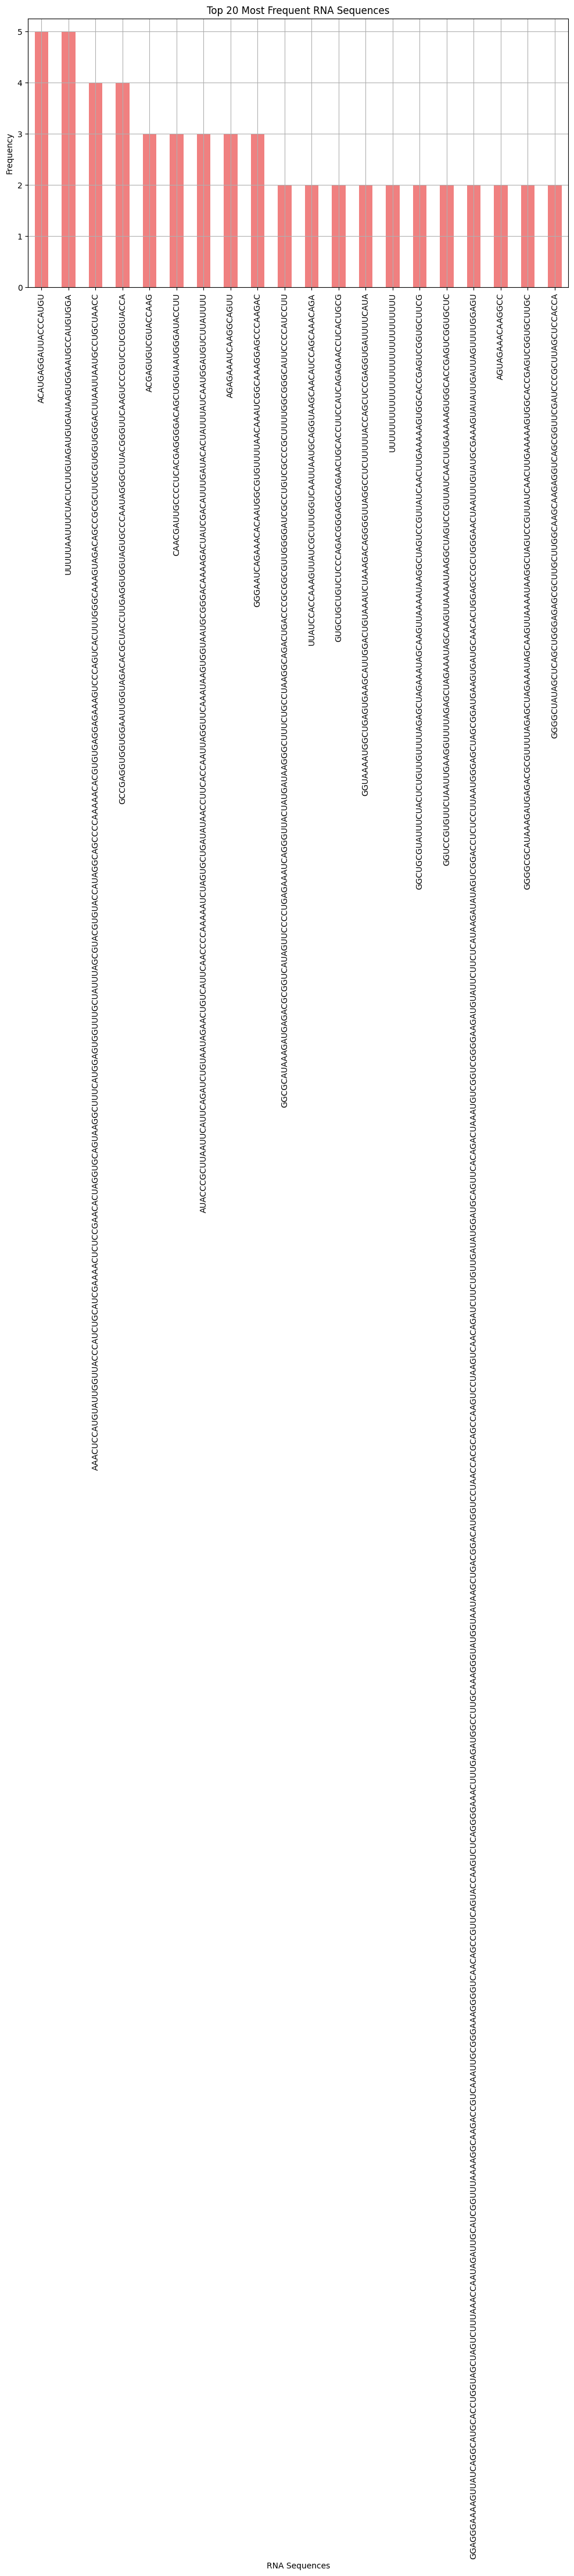

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('train_sequences.csv')

# Display the first few rows of the data to understand the structure
print(df.head())

# Visualization 1: Sequence length distribution
df['sequence_length'] = df['sequence'].apply(len)

# Plotting the sequence length distribution
plt.figure(figsize=(10, 6))
# Only keep sequences of the same length for comparison
fixed_length = 30
subset = df[df['sequence'].apply(len) == fixed_length]['sequence']

# Create a dataframe of characters by position
composition_df = pd.DataFrame([list(seq) for seq in subset])
composition_counts = composition_df.apply(lambda col: col.value_counts()).fillna(0)

# Normalize and plot
plt.figure(figsize=(12, 5))
sns.heatmap(composition_counts, cmap='viridis', annot=True, fmt='.0f')
plt.title(f'Nucleotide Frequency at Each Position (Length {fixed_length})')
plt.xlabel('Position')
plt.ylabel('Nucleotide')
plt.show()


# Visualization 2: Count of unique sequences
sequence_counts = df['sequence'].value_counts()

# Plotting the count of unique sequences
plt.figure(figsize=(12, 6))
sequence_counts.head(20).plot(kind='bar', color='lightcoral')
plt.title('Top 20 Most Frequent RNA Sequences')
plt.xlabel('RNA Sequences')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<ipython-input-22-bc6c9f0f2e82>:20: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



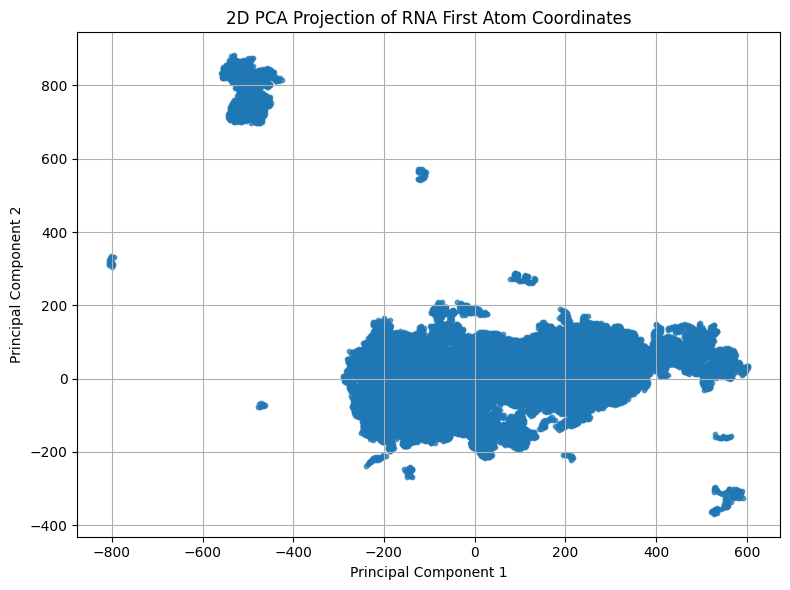

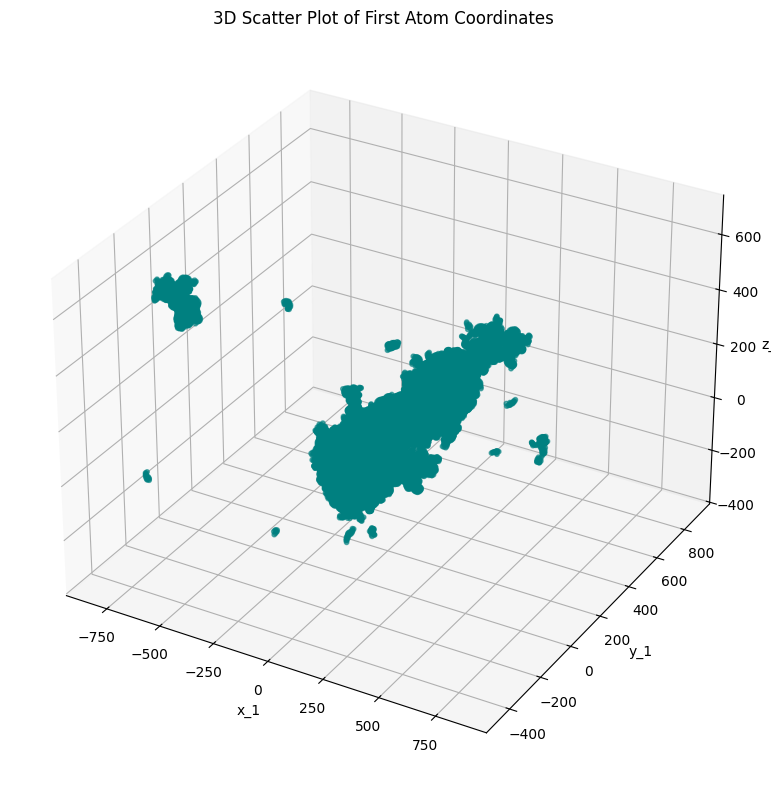

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('train_labels.csv')

# Drop rows with missing x_1, y_1, or z_1 values
df_clean = df.dropna(subset=['x_1', 'y_1', 'z_1'])

# Extract the first coordinate triplet
coords = df_clean[['x_1', 'y_1', 'z_1']].values

### Visualization 1: 2D PCA projection of (x_1, y_1, z_1)
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(coords)

plt.figure(figsize=(8, 6))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1], alpha=0.7, s=10, cmap='viridis')
plt.title("2D PCA Projection of RNA First Atom Coordinates")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualization 2: 3D Scatter Plot of x_1, y_1, z_1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['x_1'], df_clean['y_1'], df_clean['z_1'], alpha=0.6, s=10, c='teal')
ax.set_title("3D Scatter Plot of First Atom Coordinates")
ax.set_xlabel("x_1")
ax.set_ylabel("y_1")
ax.set_zlabel("z_1")
plt.tight_layout()
plt.show()
